In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.model_selection import GridSearchCV

#### Loading the csv file from Project 1 which was created by exporting the dataset with one-hot encoding perfomed

In [3]:
house_sales = pd.read_csv("house_sales_1h.csv")

In [4]:
house_sales = house_sales.drop(['Unnamed: 0'],axis=1)

In [5]:
house_sales.head(10)
house_sales.columns

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,sale_month_03,sale_month_04,sale_month_05,sale_month_06,sale_month_07,sale_month_08,sale_month_09,sale_month_10,sale_month_11,sale_month_12
0,3,1.00,1180.0,5650.0,1.0,0,0,3,2.0,1180.0,...,0,0,0,0,0,0,0,1,0,0
1,3,2.25,2570.0,7242.0,2.0,0,0,3,2.0,2170.0,...,0,0,0,0,0,0,0,0,0,1
2,2,1.00,770.0,10000.0,1.0,0,0,3,1.0,770.0,...,0,0,0,0,0,0,0,0,0,0
3,4,3.00,1960.0,5000.0,1.0,0,0,5,2.0,1050.0,...,0,0,0,0,0,0,0,0,0,1
4,3,2.00,1680.0,8080.0,1.0,0,0,3,3.0,1680.0,...,0,0,0,0,0,0,0,0,0,0
5,4,2.25,5420.0,7620.0,1.0,0,0,3,4.0,3890.0,...,0,0,1,0,0,0,0,0,0,0
6,3,2.25,1715.0,6819.0,2.0,0,0,3,2.0,1715.0,...,0,0,0,1,0,0,0,0,0,0
7,3,1.50,1060.0,9711.0,1.0,0,0,3,2.0,1060.0,...,0,0,0,0,0,0,0,0,0,0
8,3,2.25,1890.0,6560.0,2.0,0,0,3,2.0,1890.0,...,1,0,0,0,0,0,0,0,0,0
9,2,1.00,1160.0,6000.0,1.5,0,0,4,2.0,860.0,...,0,0,1,0,0,0,0,0,0,0


Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_renovated', 'sqft_living15', 'sqft_lot15', 'price',
       'sale_year', 'zipcode_1', 'zipcode_2', 'zipcode_3', 'zipcode_4',
       'sale_month_01', 'sale_month_02', 'sale_month_03', 'sale_month_04',
       'sale_month_05', 'sale_month_06', 'sale_month_07', 'sale_month_08',
       'sale_month_09', 'sale_month_10', 'sale_month_11', 'sale_month_12'],
      dtype='object')

#### Train and Test Split

In [5]:
X = house_sales.drop(['price'],axis=1)
y = house_sales['price']

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
y_train.shape
y_test.shape
X_train_org.shape
X_test_org.shape

(14557,)

(4853,)

(14557, 31)

(4853, 31)

In [6]:
scaler = StandardScaler()

In [7]:
X_train_scale = scaler.fit_transform(X_train_org)

In [8]:
X_test_scale = scaler.transform(X_test_org)

In [9]:
X_train_scale.shape

(14557, 31)

## Apply any two model with bagging and pasting

### Lasso Regression with bagging

In [13]:
from sklearn.ensemble import BaggingRegressor
lass = Lasso(alpha = 10)
bag_clf = BaggingRegressor(lass,n_estimators=500, max_samples=100, bootstrap=True, random_state=0, oob_score=True)
bag_clf.fit(X_train_org, y_train)
y_pred = bag_clf.predict(X_test_org)
bag_clf.score(X_train_org, y_train)
bag_clf.score(X_test_org, y_test)

C:\Users\sures\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35026357275.284424, tolerance: 1870765427.8568752
  positive)
C:\Users\sures\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 725701422950.6212, tolerance: 5006309577.643401
  positive)
C:\Users\sures\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1034332476509.8291, tolerance: 1213999585.0417442
  positive)
C:\Users\sures\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality g

C:\Users\sures\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 785716292520.3787, tolerance: 1540688267.1540751
  positive)
C:\Users\sures\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 76715649489.9961, tolerance: 680407881.9886111
  positive)
C:\Users\sures\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 383292375941.8208, tolerance: 3503923635.3346167
  positive)
C:\Users\sures\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap:

C:\Users\sures\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19587556472.886475, tolerance: 911989828.6089001
  positive)
C:\Users\sures\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 89923466217.35828, tolerance: 753446720.615275
  positive)
C:\Users\sures\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3638264634.602051, tolerance: 662035157.820724
  positive)
C:\Users\sures\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1

BaggingRegressor(base_estimator=Lasso(alpha=10, copy_X=True, fit_intercept=True,
                                      max_iter=1000, normalize=False,
                                      positive=False, precompute=False,
                                      random_state=None, selection='cyclic',
                                      tol=0.0001, warm_start=False),
                 bootstrap=True, bootstrap_features=False, max_features=1.0,
                 max_samples=100, n_estimators=500, n_jobs=None, oob_score=True,
                 random_state=0, verbose=0, warm_start=False)

0.6963510043350193

0.7006049847057119

###### Lasso regression with bagging
Train score: 0.6963

Test score: 0.7006

### Lasso Regression with pasting

In [14]:
from sklearn.ensemble import BaggingRegressor
lass = Lasso(alpha = 10)
bag_clf = BaggingRegressor(lass,n_estimators=500, max_samples=100, bootstrap=False, random_state=0)
bag_clf.fit(X_train_org, y_train)
y_pred = bag_clf.predict(X_test_org)
bag_clf.score(X_train_org, y_train)
bag_clf.score(X_test_org, y_test)

C:\Users\sures\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33593532896.500732, tolerance: 1871571674.631875
  positive)
C:\Users\sures\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 725701422950.6212, tolerance: 5006309577.643401
  positive)
C:\Users\sures\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1034332476509.8291, tolerance: 1213999585.0417442
  positive)
C:\Users\sures\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality ga

C:\Users\sures\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 785716292520.3787, tolerance: 1540688267.1540751
  positive)
C:\Users\sures\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 76715649489.9961, tolerance: 680407881.9886111
  positive)
C:\Users\sures\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 383292375941.8208, tolerance: 3503923635.3346167
  positive)
C:\Users\sures\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap:

C:\Users\sures\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19587556472.886475, tolerance: 911989828.6089001
  positive)
C:\Users\sures\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 89923466217.35828, tolerance: 753446720.615275
  positive)
C:\Users\sures\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3638264634.602051, tolerance: 662035157.820724
  positive)
C:\Users\sures\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5

BaggingRegressor(base_estimator=Lasso(alpha=10, copy_X=True, fit_intercept=True,
                                      max_iter=1000, normalize=False,
                                      positive=False, precompute=False,
                                      random_state=None, selection='cyclic',
                                      tol=0.0001, warm_start=False),
                 bootstrap=False, bootstrap_features=False, max_features=1.0,
                 max_samples=100, n_estimators=500, n_jobs=None,
                 oob_score=False, random_state=0, verbose=0, warm_start=False)

0.6962981113934363

0.7005469603812429

###### Lasso regression with pasting
Train score: 0.6962

Test score: 0.7005

### KNN regression with bagging

In [15]:
from sklearn.neighbors import KNeighborsRegressor

In [16]:
knn = KNeighborsRegressor(n_neighbors = 10)
bag_clf = BaggingRegressor(knn,n_estimators=500, max_samples=100, bootstrap=True, random_state=0, oob_score=True)
bag_clf.fit(X_train_scale, y_train)

BaggingRegressor(base_estimator=KNeighborsRegressor(algorithm='auto',
                                                    leaf_size=30,
                                                    metric='minkowski',
                                                    metric_params=None,
                                                    n_jobs=None, n_neighbors=10,
                                                    p=2, weights='uniform'),
                 bootstrap=True, bootstrap_features=False, max_features=1.0,
                 max_samples=100, n_estimators=500, n_jobs=None, oob_score=True,
                 random_state=0, verbose=0, warm_start=False)

In [17]:
bag_clf.score(X_train_scale, y_train)
bag_clf.score(X_test_scale, y_test)

0.3874534457063108

0.3932087829746911

###### KNN regression with bagging
Train score: 0.3875

Test score: 0.3932

### KNN regression with pasting

In [18]:
bag_clf = BaggingRegressor(knn,n_estimators=500, max_samples=100, bootstrap=False, random_state=0)
bag_clf.fit(X_train_scale, y_train)

BaggingRegressor(base_estimator=KNeighborsRegressor(algorithm='auto',
                                                    leaf_size=30,
                                                    metric='minkowski',
                                                    metric_params=None,
                                                    n_jobs=None, n_neighbors=10,
                                                    p=2, weights='uniform'),
                 bootstrap=False, bootstrap_features=False, max_features=1.0,
                 max_samples=100, n_estimators=500, n_jobs=None,
                 oob_score=False, random_state=0, verbose=0, warm_start=False)

In [19]:
bag_clf.score(X_train_scale, y_train)
bag_clf.score(X_test_scale, y_test)

0.38750932373484054

0.39322732412164707

###### KNN regression with pasting

Train score: 0.3875

Test score: 0.3932

## Any two models with AdaBoosting

### KNN Regression with AdaBoosting

In [19]:
from sklearn.ensemble import AdaBoostRegressor
param_grid = {'learning_rate': [0.1,0.5,1.0]}
ada_clf = AdaBoostRegressor(knn,n_estimators=100)
GridSearch_dtclf = GridSearchCV(ada_clf, param_grid,cv=4,return_train_score=True,n_jobs= -1)

GridSearch_dtclf.fit(X_train_scale, y_train)

GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=AdaBoostRegressor(base_estimator=KNeighborsRegressor(algorithm='auto',
                                                                            leaf_size=30,
                                                                            metric='minkowski',
                                                                            metric_params=None,
                                                                            n_jobs=None,
                                                                            n_neighbors=10,
                                                                            p=2,
                                                                            weights='uniform'),
                                         learning_rate=1.0, loss='linear',
                                         n_estimators=100, random_state=None),
             iid='warn', n_jobs=-1,
             param_grid=

In [21]:
GridSearch_dtclf.best_params_
GridSearch_dtclf.best_score_

{'learning_rate': 0.1}

0.6824359788967452

In [24]:
result_lasso_ada= pd.DataFrame(GridSearch_dtclf.cv_results_)
result_lasso_ada

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,2425.573900,36.823770,679.349788,11.191897,0.1,{'learning_rate': 0.1},0.717673,0.725576,0.658574,0.627911,0.682436,0.040759,1,0.887582,0.889253,0.889515,0.888460,0.888703,0.000755
1,2289.765299,40.593992,638.907869,7.948389,0.5,{'learning_rate': 0.5},0.682086,0.677771,0.588753,0.584981,0.633401,0.046575,2,0.895890,0.896635,0.896761,0.895131,0.896104,0.000653
2,1197.164451,43.103683,360.531623,24.509185,1,{'learning_rate': 1.0},0.670381,0.661927,0.574545,0.572081,0.619737,0.046525,3,0.892180,0.892788,0.892049,0.891393,0.892102,0.000496


In [22]:
from sklearn.ensemble import AdaBoostRegressor

ada_clf = AdaBoostRegressor(knn,n_estimators=100,learning_rate = 0.1)
ada_clf.fit(X_train_scale, y_train)

AdaBoostRegressor(base_estimator=KNeighborsRegressor(algorithm='auto',
                                                     leaf_size=30,
                                                     metric='minkowski',
                                                     metric_params=None,
                                                     n_jobs=None,
                                                     n_neighbors=10, p=2,
                                                     weights='uniform'),
                  learning_rate=0.1, loss='linear', n_estimators=100,
                  random_state=None)

In [23]:
ada_clf.score(X_train_scale, y_train)
ada_clf.score(X_test_scale, y_test)

0.8911564061260124

0.680194784315152

###### KNN regression with AdaBoosting

Train score: 0.8915

Test score: 0.6801

#### Lasso regression with Adaboosting

In [25]:
ada_clf = AdaBoostRegressor(lass, n_estimators=200, learning_rate=0.25, random_state=0)
ada_clf.fit(X_train_org, y_train)
ada_clf.score(X_train_org, y_train)
ada_clf.score(X_test_org, y_test)

C:\Users\ksvig\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1692836981609893.0, tolerance: 1983320847345.424
  positive)
C:\Users\ksvig\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 122064115508942.5, tolerance: 2361692487513.981
  positive)
C:\Users\ksvig\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2742041298284220.0, tolerance: 2510034634344.4
  positive)
C:\Users\ksvig\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 

C:\Users\ksvig\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8592526723836815.0, tolerance: 6127693005931.567
  positive)
C:\Users\ksvig\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1300759769709724.0, tolerance: 6111230282980.742
  positive)
C:\Users\ksvig\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 549160369977560.0, tolerance: 6248897380893.839
  positive)
C:\Users\ksvig\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap

AdaBoostRegressor(base_estimator=Lasso(alpha=10, copy_X=True,
                                       fit_intercept=True, max_iter=1000,
                                       normalize=False, positive=False,
                                       precompute=False, random_state=None,
                                       selection='cyclic', tol=0.0001,
                                       warm_start=False),
                  learning_rate=0.25, loss='linear', n_estimators=200,
                  random_state=0)

0.4745085737641238

0.47566913517727866

###### Lasso regression with AdaBoosting

Train score: 0.4745

Test score: 0.4756

#### Gradient Boosting

In [26]:
from  sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt.fit(X_train_org, y_train)
gbrt.score(X_train_org, y_train)
gbrt.score(X_test_org, y_test)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=1.0, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=3,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

0.6338424277797545

0.60530124676125

###### Gradient Boosting

Train score: 0.6338

Test score: 0.6053

### PCA

In [9]:
from sklearn.decomposition import PCA

pca = PCA()

X_train_pca = pca.fit_transform(X_train_scale)

pca.explained_variance_ratio_

cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

array([1.48625508e-01, 6.58624527e-02, 5.77493994e-02, 5.42705925e-02,
       4.89004313e-02, 4.11746013e-02, 3.82630520e-02, 3.64327648e-02,
       3.58706223e-02, 3.57670854e-02, 3.56110077e-02, 3.54234244e-02,
       3.52214449e-02, 3.47419450e-02, 3.45836382e-02, 3.44475895e-02,
       3.40154696e-02, 3.31401199e-02, 3.09097065e-02, 2.55182044e-02,
       2.06382313e-02, 1.94052821e-02, 1.73484472e-02, 1.30633681e-02,
       1.12460788e-02, 9.82845117e-03, 8.32395567e-03, 1.86222295e-03,
       1.75490264e-03, 2.93112132e-32, 9.10193209e-34])

23

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 23)
X_train_pca = pca.fit_transform(X_train_scale)
np.sum(pca.explained_variance_ratio_)

0.9539210206405736

In [11]:
X_train_pca = pca.fit_transform(X_train_scale)
X_test_pca = pca.transform(X_test_scale)

In [13]:
X_train_pca.shape

(14557, 23)

# Linear Regression

In [24]:
from sklearn.model_selection import GridSearchCV
model = LinearRegression()
parameters = {'normalize':[True,False]}
grid_search_lr = GridSearchCV(model,parameters, cv=6, return_train_score=True)
grid_search_lr.fit(X_train_pca, y_train)
print("Best parameters: {}".format(grid_search_lr.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_search_lr.best_score_))

GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='warn', n_jobs=None, param_grid={'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

Best parameters: {'normalize': True}
Best cross-validation score: 0.6823


In [25]:
results = pd.DataFrame(grid_search_lr.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_normalize,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,mean_train_score,std_train_score
0,0.019851,0.004508,0.000487,0.000488,True,{'normalize': True},0.686396,0.693721,0.700484,0.681638,...,0.014181,1,0.683278,0.681929,0.68052,0.684174,0.69033,0.685282,0.684252,0.003117
1,0.018153,0.007425,0.003114,0.005667,False,{'normalize': False},0.686396,0.693721,0.700484,0.681638,...,0.014181,1,0.683278,0.681929,0.68052,0.684174,0.69033,0.685282,0.684252,0.003117


In [26]:
lreg = LinearRegression(normalize = True)
lreg.fit(X_train_pca, y_train)
print(lreg.score(X_train_pca, y_train))
lr_test_score = lreg.score(X_test_pca, y_test)
lr_test_score

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

0.68396906046448


0.6773413029806508

In [27]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

  
kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(lreg , X_train_pca, y_train, cv=kfold)))
scores = cross_val_score(lreg , X_train_pca, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[0.68639568 0.6937212  0.70048424 0.68163793 0.65631057 0.67503159]
0.6822635349611175


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

Text(0.5, 0, 'sqft_living')

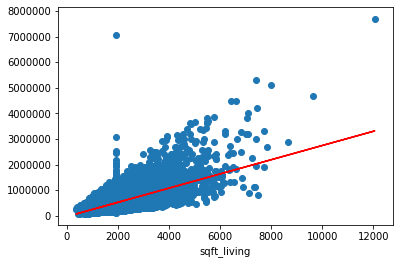

In [37]:
#PLOT

%matplotlib inline
import matplotlib.pyplot as plt

X_train_array = X_train_org.to_numpy()

X_train_rm = X_train_array[:,2].reshape(-1,1)
lreg.fit(X_train_rm, y_train)
y_predict = lreg.predict(X_train_rm)

plt.plot(X_train_rm, y_predict, c = 'r')
plt.scatter(X_train_rm,y_train)
plt.xlabel('sqft_living')

### Linear Regression Result:

Best parameter: {'normalize': False}

Average Cross validation score: 0.7038

Test score: 0.7057

# KNN Regression

In [28]:
grid_parms_knn = {'n_neighbors':[1,5,10,15,20]}

In [29]:
knn = KNeighborsRegressor()
grid_search_knn = GridSearchCV(knn, grid_parms_knn,cv=6,return_train_score=True,n_jobs= -1)
grid_search_knn.fit(X_train_pca, y_train)

GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid={'n_neighbors': [1, 5, 10, 15, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [30]:
print("Best parameters: {}".format(grid_search_knn.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_search_knn.best_score_))
pd.DataFrame(grid_search_knn.cv_results_)

Best parameters: {'n_neighbors': 10}
Best cross-validation score: 0.7045


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,mean_train_score,std_train_score
0,0.052572,0.001468,0.525862,0.050693,1,{'n_neighbors': 1},0.552870,0.594987,0.526282,0.559704,...,0.020208,5,1.000000,0.999999,0.999999,1.000000,0.999999,0.999999,1.000000,3.534154e-07
1,0.064240,0.003173,1.084457,0.100328,5,{'n_neighbors': 5},0.703616,0.718846,0.713725,0.710326,...,0.021165,2,0.793521,0.793628,0.799079,0.796154,0.802338,0.799907,0.797438,3.273658e-03
2,0.078291,0.004403,1.477936,0.141290,10,{'n_neighbors': 10},0.707794,0.718234,0.718126,0.715144,...,0.017408,1,0.752369,0.753018,0.751799,0.755605,0.762834,0.759842,0.755911,4.108806e-03
3,0.071313,0.007537,1.803919,0.168092,15,{'n_neighbors': 15},0.699535,0.710447,0.713376,0.707198,...,0.020153,3,0.729178,0.728929,0.729881,0.732543,0.742140,0.735670,0.733057,4.686263e-03
4,0.074756,0.005444,2.014843,0.208061,20,{'n_neighbors': 20},0.687453,0.703200,0.703207,0.697244,...,0.023146,4,0.710414,0.713064,0.712056,0.714987,0.725834,0.715430,0.715297,5.007843e-03


In [31]:
knn = KNeighborsRegressor(n_neighbors = 10)
knn.fit(X_train_pca, y_train)
print(knn.score(X_train_pca, y_train))
knn_test_score_ = knn.score(X_test_pca, y_test)
knn_test_score_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')

0.7604548397000092


0.7072202536552128

In [32]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

  
kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(knn , X_train_pca, y_train, cv=kfold)))
scores = cross_val_score(knn , X_train_pca, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[0.7077944  0.71823421 0.71812636 0.71514419 0.66855822 0.6992049 ]
0.7045103812314504


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')

Text(0.5, 0, 'sqft_living')

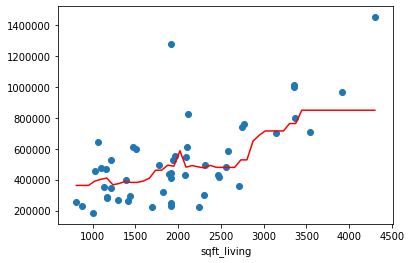

In [38]:
X_b = X_train_array[:50,2].reshape(-1,1)
y_b = y_train[:50]

knn_reg = KNeighborsRegressor(10)
knn_reg.fit(X_b, y_b)

X_new=np.linspace(X_b.min(), X_b.max(), 50).reshape(50, 1)
y_predict = knn_reg.predict(X_new)

plt.plot(X_new, y_predict, c = 'r')
plt.scatter(X_b, y_b)
plt.xlabel('sqft_living')

### KNN Regression Result:

Best parameter: {n_neighbors: 10}

Average Cross validation score: 0.7050

Test score: 0.7091

# Ridge Regression

In [39]:
grid_parms_ridge = {'alpha': [0.01, 0.1, 1, 10, 100]}

In [40]:
ridge = Ridge()
grid_search_ridge = GridSearchCV(estimator = ridge,param_grid = grid_parms_ridge,return_train_score=True,n_jobs= -1,cv=5)
grid_search_ridge.fit(X_train_pca, y_train)
print("Best parameters: {}".format(grid_search_ridge.best_params_))

print("Best cross-validation score: {:.4f}".format(grid_search_ridge.best_score_))

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

Best parameters: {'alpha': 100}
Best cross-validation score: 0.6825


In [41]:
ridge = Ridge(alpha = 1)
ridge.fit(X_train_pca, y_train)
print(ridge.score(X_train_pca, y_train))
ridge_test_score_ = ridge.score(X_test_pca, y_test)
ridge_test_score_

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

0.683969059764148


0.6773419572751327

In [42]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

  
kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(ridge , X_train_pca, y_train, cv=kfold)))
scores = cross_val_score(ridge , X_train_pca, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[0.68639614 0.69372046 0.70048343 0.68164124 0.65630727 0.67503543]
0.6822639967676883


In [43]:
result_ridge = pd.DataFrame(grid_search_ridge.cv_results_)
result_ridge

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.024169,0.001897,0.002983,0.002161,0.01,{'alpha': 0.01},0.687541,0.685383,0.698581,0.679621,...,0.682465,0.012282,5,0.682731,0.683481,0.680462,0.684660,0.689772,0.684221,0.003095
1,0.026346,0.002377,0.001751,0.002156,0.1,{'alpha': 0.1},0.687541,0.685383,0.698581,0.679621,...,0.682465,0.012282,4,0.682731,0.683481,0.680462,0.684660,0.689772,0.684221,0.003095
2,0.022788,0.004117,0.000588,0.001176,1,{'alpha': 1},0.687541,0.685383,0.698582,0.679620,...,0.682465,0.012282,3,0.682731,0.683481,0.680462,0.684660,0.689772,0.684221,0.003095
3,0.027148,0.006793,0.000000,0.000000,10,{'alpha': 10},0.687541,0.685384,0.698595,0.679612,...,0.682468,0.012284,2,0.682731,0.683481,0.680462,0.684660,0.689772,0.684221,0.003095
4,0.022837,0.002139,0.000000,0.000000,100,{'alpha': 100},0.687533,0.685382,0.698708,0.679520,...,0.682482,0.012298,1,0.682721,0.683470,0.680452,0.684649,0.689761,0.684210,0.003095


([<matplotlib.axis.XTick at 0x1da59e83780>,
 <a list of 5 Text xticklabel objects>)

Text(0.5, 0, 'Alpha')

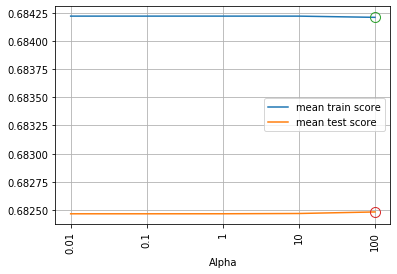

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(result_ridge.shape[0]), result_ridge['mean_train_score'], label = 'mean train score')
plt.plot(range(result_ridge.shape[0]), result_ridge['mean_test_score'], label = 'mean test score')
plt.xticks(range(result_ridge.shape[0]), result_ridge['param_alpha'], rotation = 90)
plt.plot([grid_search_ridge.best_index_], result_ridge['mean_train_score'][grid_search_ridge.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.plot([grid_search_ridge.best_index_], result_ridge['mean_test_score'][grid_search_ridge.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.grid()
plt.legend()
plt.xlabel('Alpha')

### Ridge Regression Result:

Best parameter: {'alpha': 1}

Average Cross validation score: 0.7038

Test score: 0.7058

# Lasso Regression

In [45]:
grid_parms_lasso = {'alpha': [0.01, 0.1, 1, 10,100]}

In [46]:
lasso = Lasso()
grid_search_lasso = GridSearchCV(estimator = lasso,param_grid = grid_parms_lasso,return_train_score=True,n_jobs=-1,cv=5)
grid_search_lasso.fit(X_train_pca, y_train)
print("Best parameters: {}".format(grid_search_lasso.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_search_lasso.best_score_))

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

Best parameters: {'alpha': 100}
Best cross-validation score: 0.6825


In [47]:
lass = Lasso(alpha = 10)
lass.fit(X_train_pca, y_train)
print(lass.score(X_train_pca, y_train))
lass_test_score_ = lass.score(X_test_pca, y_test)
lass_test_score_

Lasso(alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

0.6839690444654867


0.6773447145570343

In [48]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

  
kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(lass , X_train_pca, y_train, cv=kfold)))
scores = cross_val_score(lass , X_train_pca, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[0.68639406 0.69372116 0.7004818  0.68164669 0.65630442 0.67504227]
0.6822650656013938


In [49]:
result_lasso = pd.DataFrame(grid_search_lasso.cv_results_)
result_lasso

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.026380,0.004414,0.003290,0.001962,0.01,{'alpha': 0.01},0.687541,0.685383,0.698581,0.679621,...,0.682465,0.012282,5,0.682731,0.683481,0.680462,0.684660,0.689772,0.684221,0.003095
1,0.034133,0.003441,0.002531,0.000929,0.1,{'alpha': 0.1},0.687541,0.685383,0.698581,0.679621,...,0.682465,0.012282,4,0.682731,0.683481,0.680462,0.684660,0.689772,0.684221,0.003095
2,0.022070,0.004758,0.004988,0.006236,1,{'alpha': 1},0.687541,0.685382,0.698581,0.679621,...,0.682465,0.012282,3,0.682731,0.683481,0.680462,0.684660,0.689772,0.684221,0.003095
3,0.032393,0.005724,0.000808,0.001175,10,{'alpha': 10},0.687541,0.685379,0.698585,0.679620,...,0.682466,0.012281,2,0.682731,0.683481,0.680462,0.684660,0.689772,0.684221,0.003095
4,0.029068,0.006209,0.001402,0.001506,100,{'alpha': 100},0.687546,0.685348,0.698623,0.679609,...,0.682475,0.012275,1,0.682730,0.683479,0.680461,0.684659,0.689770,0.684220,0.003095


([<matplotlib.axis.XTick at 0x1da59f86ef0>,
 <a list of 5 Text xticklabel objects>)

Text(0.5, 0, 'Alpha')

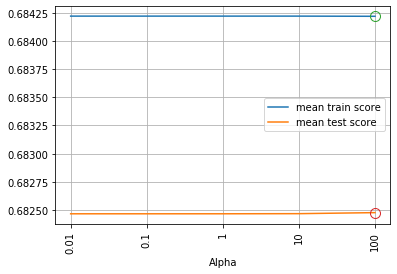

In [50]:
%matplotlib inline

plt.plot(range(result_lasso.shape[0]), result_lasso['mean_train_score'], label = 'mean train score')
plt.plot(range(result_lasso.shape[0]), result_lasso['mean_test_score'], label = 'mean test score')
plt.xticks(range(result_lasso.shape[0]), result_lasso['param_alpha'], rotation = 90)
plt.plot([grid_search_lasso.best_index_], result_lasso['mean_train_score'][grid_search_lasso.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.plot([grid_search_lasso.best_index_], result_lasso['mean_test_score'][grid_search_lasso.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.grid()
plt.legend()
plt.xlabel('Alpha')

### Lasso Regression Result:

Best parameter: {'alpha': 100}

Average Cross validation score: 0.7038

Test score: 0.7057

# Polynominal Regression

In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

In [13]:
param_grid_poly = {'polynomialfeatures__degree': np.arange(3)}

grid_poly = GridSearchCV(PolynomialRegression(), param_grid_poly,return_train_score=True,n_jobs=-1,cv=5)

In [14]:
grid_poly.fit(X_train_pca, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('polynomialfeatures',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('linearregression',
                                        LinearRegression(copy_X=True,
                                                         fit_intercept=True,
                                                         n_jobs=None,
                                                         normalize=False))],
                                verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'polynomialfeatures__degree': array([0, 1, 2])},
             pre_dispatch='

In [15]:
print("Best parameters: {}".format(grid_poly.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_poly.best_score_))

Best parameters: {'polynomialfeatures__degree': 2}
Best cross-validation score: 0.7802


In [16]:
pol = PolynomialFeatures(degree = 2)
X_pol = pol.fit_transform(X_train_pca)
Xt_pol = pol.fit_transform(X_test_pca)
pol_reg = LinearRegression()
pol_reg.fit(X_pol,y_train)
print(pol_reg.score(X_pol, y_train))
pol_reg_test_score = pol_reg.score(Xt_pol, y_test)
pol_reg_test_score

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

0.8089876852859864


0.791897746885763

In [17]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

  
kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(pol_reg , X_pol, y_train, cv=kfold)))
scores = cross_val_score(pol_reg , X_pol, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[0.7690127  0.79655072 0.76541394 0.78386256 0.79456455 0.76429057]
0.7789491715574357


In [18]:
result_poly = pd.DataFrame(grid_poly.cv_results_)
result_poly

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_polynomialfeatures__degree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.049600,0.017270,0.024000,0.000000,0,{'polynomialfeatures__degree': 0},-0.000004,-0.000013,-0.001173,-0.000576,...,-0.000369,0.000454,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.109602,0.049872,0.007201,0.001601,1,{'polynomialfeatures__degree': 1},0.687541,0.685383,0.698581,0.679621,...,0.682465,0.012282,2,0.682731,0.683481,0.680462,0.684660,0.689772,0.684221,0.003095
2,0.891195,0.036436,0.044008,0.005666,2,{'polynomialfeatures__degree': 2},0.772783,0.783691,0.774885,0.790155,...,0.780232,0.006243,1,0.815676,0.813885,0.814938,0.810115,0.813796,0.813682,0.001915


([<matplotlib.axis.XTick at 0x18ec2de3c50>,
 <a list of 3 Text xticklabel objects>)

Text(0.5,0,'Degree')

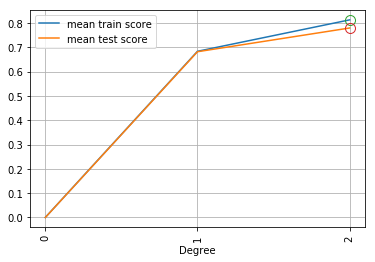

In [19]:
plt.plot(range(result_poly.shape[0]), result_poly['mean_train_score'], label = 'mean train score')
plt.plot(range(result_poly.shape[0]), result_poly['mean_test_score'], label = 'mean test score')
plt.xticks(range(result_poly.shape[0]), result_poly['param_polynomialfeatures__degree'], rotation = 90)
plt.plot([grid_poly.best_index_], result_poly['mean_train_score'][grid_poly.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.plot([grid_poly.best_index_], result_poly['mean_test_score'][grid_poly.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.grid()
plt.xlabel('Degree')
plt.legend()

### Polynominal Regression Result:

Best parameters: {'polynomialfeatures__degree': 2}

Average Cross validation score: 0.7888

Test score: 0.7942

# Linear (Simple) SVR

In [58]:
grid_parms_svrl = {'C': [0.01, 0.1, 1, 10, 100], 'epsilon' : [0.01, 0.1, 1, 10, 100]}

In [59]:
linearsvr = LinearSVR()
grid_svrl = GridSearchCV(estimator = linearsvr,param_grid = grid_parms_svrl,return_train_score=True,n_jobs= -1,cv=10)

In [60]:
grid_svrl.fit(X_train_pca,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LinearSVR(C=1.0, dual=True, epsilon=0.0,
                                 fit_intercept=True, intercept_scaling=1.0,
                                 loss='epsilon_insensitive', max_iter=1000,
                                 random_state=None, tol=0.0001, verbose=0),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'epsilon': [0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [61]:
print("Best parameters: {}".format(grid_svrl.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_svrl.best_score_))

Best parameters: {'C': 100, 'epsilon': 100}
Best cross-validation score: 0.5362


In [62]:
lsvr = LinearSVR(C = 100, epsilon = 1)
        
lsvr.fit(X_train_pca, y_train)

print(lsvr.score(X_train_pca, y_train))
lsvr_test_score = lsvr.score(X_test_pca, y_test)
lsvr_test_score

LinearSVR(C=100, dual=True, epsilon=1, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

0.5487681920871497


0.5516716527684304

In [63]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

  
kfold = KFold(n_splits=10)
print("Cross-validation scores:\n{}".format(cross_val_score(lsvr , X_train_pca, y_train, cv=kfold)))
scores = cross_val_score(lsvr, X_train_pca, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[0.52253028 0.55032063 0.54249615 0.5374965  0.56630024 0.57185346
 0.53880078 0.50231737 0.4983891  0.5304273 ]
0.5361205764793011


In [64]:
result_linearsvr = pd.DataFrame(grid_svrl.cv_results_)
result_linearsvr

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_epsilon,params,split0_test_score,split1_test_score,split2_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.047400,0.006460,0.002607,0.003414,0.01,0.01,"{'C': 0.01, 'epsilon': 0.01}",-1.972890,-2.290680,-2.219066,...,-2.144307,-2.158298,-2.141810,-2.125369,-2.150347,-2.165854,-2.187593,-2.132913,-2.151607,0.018454
1,0.040118,0.005337,0.001959,0.003314,0.01,0.1,"{'C': 0.01, 'epsilon': 0.1}",-1.972890,-2.290680,-2.219066,...,-2.144307,-2.158298,-2.141810,-2.125369,-2.150347,-2.165854,-2.187593,-2.132913,-2.151607,0.018454
2,0.047349,0.008295,0.002345,0.003373,0.01,1,"{'C': 0.01, 'epsilon': 1}",-1.972890,-2.290680,-2.219066,...,-2.144307,-2.158298,-2.141810,-2.125369,-2.150347,-2.165854,-2.187593,-2.132913,-2.151607,0.018454
3,0.046975,0.004913,0.001623,0.001717,0.01,10,"{'C': 0.01, 'epsilon': 10}",-1.972890,-2.290680,-2.219066,...,-2.144307,-2.158298,-2.141810,-2.125369,-2.150347,-2.165854,-2.187593,-2.132913,-2.151607,0.018454
4,0.046849,0.008960,0.003503,0.003369,0.01,100,"{'C': 0.01, 'epsilon': 100}",-1.972890,-2.290680,-2.219066,...,-2.144307,-2.158298,-2.141810,-2.125369,-2.150347,-2.165854,-2.187593,-2.132913,-2.151607,0.018454
5,0.044176,0.003352,0.002899,0.001568,0.1,0.01,"{'C': 0.1, 'epsilon': 0.01}",-1.964193,-2.280831,-2.209327,...,-2.134949,-2.148912,-2.132454,-2.116149,-2.140916,-2.156419,-2.178056,-2.123570,-2.142217,0.018374
6,0.043561,0.005014,0.002982,0.002451,0.1,0.1,"{'C': 0.1, 'epsilon': 0.1}",-1.964193,-2.280831,-2.209327,...,-2.134949,-2.148912,-2.132454,-2.116149,-2.140916,-2.156419,-2.178056,-2.123570,-2.142217,0.018374
7,0.040699,0.006396,0.001606,0.001858,0.1,1,"{'C': 0.1, 'epsilon': 1}",-1.964193,-2.280831,-2.209327,...,-2.134949,-2.148912,-2.132454,-2.116149,-2.140916,-2.156419,-2.178056,-2.123570,-2.142217,0.018374
8,0.051803,0.010440,0.001993,0.001657,0.1,10,"{'C': 0.1, 'epsilon': 10}",-1.964193,-2.280831,-2.209327,...,-2.134949,-2.148912,-2.132454,-2.116149,-2.140916,-2.156419,-2.178056,-2.123570,-2.142217,0.018374
9,0.044058,0.005263,0.001780,0.001262,0.1,100,"{'C': 0.1, 'epsilon': 100}",-1.964193,-2.280831,-2.209327,...,-2.134949,-2.148912,-2.132454,-2.116149,-2.140916,-2.156419,-2.178056,-2.123570,-2.142217,0.018374


([<matplotlib.axis.XTick at 0x1da5a07c710>,
 <a list of 25 Text xticklabel objects>)

Text(0.5, 0, 'Alpha')

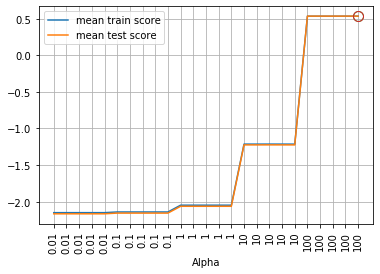

In [65]:
plt.plot(range(result_linearsvr.shape[0]), result_linearsvr['mean_train_score'], label = 'mean train score')
plt.plot(range(result_linearsvr.shape[0]), result_linearsvr['mean_test_score'], label = 'mean test score')
plt.xticks(range(result_linearsvr.shape[0]), result_linearsvr['param_C'], rotation = 90)
plt.plot([grid_svrl.best_index_], result_linearsvr['mean_train_score'][grid_svrl.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.plot([grid_svrl.best_index_], result_linearsvr['mean_test_score'][grid_svrl.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.grid()
plt.legend()
plt.xlabel('Alpha')

### Linear (Simple) SVR  Result:

Best parameters: {'C': 100, 'epsilon': 1}

Average Cross validation score: 0.5548

Test score: 0.5714

# SVR with kernel 'Linear'

In [66]:
grid_parms_linear = {'C': [0.01,0.1, 1, 10, 100]}

In [67]:
svr_linear = SVR(kernel='linear')
grid_svr_linear = GridSearchCV(estimator = svr_linear,param_grid = grid_parms_linear,return_train_score=True,n_jobs= -1,cv=6)

In [68]:
grid_svr_linear.fit(X_train_pca,y_train)

GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated',
                           kernel='linear', max_iter=-1, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1, param_grid={'C': [0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [69]:
print("Best parameters: {}".format(grid_svr_linear.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_svr_linear.best_score_))

Best parameters: {'C': 100}
Best cross-validation score: 0.6172


In [70]:
svr = SVR(kernel = 'linear',C = 100)
        
        #train the model
svr.fit(X_train_pca, y_train)
        
        #evaluate the model
print(svr.score(X_train_pca, y_train))
svr_test_score = svr.score(X_test_pca, y_test)
svr_test_score

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

0.619260108383975


0.6193448208312166

In [71]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(svr , X_train_pca, y_train, cv=kfold)))
scores = cross_val_score(svr , X_train_pca, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[0.61730555 0.62220481 0.63259665 0.63729547 0.56604042 0.62769436]
0.6171895422762955


In [72]:
result_svr_linear = pd.DataFrame(grid_svr_linear.cv_results_)
result_svr_linear

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,mean_train_score,std_train_score
0,22.346729,1.606288,2.235980,0.287966,0.01,{'C': 0.01},-0.054741,-0.061661,-0.054575,-0.057755,...,0.004658,5,-0.058991,-0.057823,-0.057455,-0.058375,-0.059385,-0.057007,-0.058173,0.000834
1,20.878590,0.710069,2.128801,0.273714,0.1,{'C': 0.1},-0.041469,-0.048745,-0.040622,-0.043683,...,0.004743,4,-0.045777,-0.045144,-0.043853,-0.045059,-0.046507,-0.045076,-0.045236,0.000805
2,22.387516,0.774766,2.236785,0.116171,1,{'C': 1},0.069918,0.064143,0.073225,0.072797,...,0.007367,3,0.064739,0.065638,0.066910,0.065357,0.067018,0.063748,0.065568,0.001151
3,21.879547,0.745329,2.285012,0.104571,10,{'C': 10},0.454060,0.455293,0.463265,0.469920,...,0.024749,2,0.446385,0.448451,0.447481,0.446716,0.457393,0.445277,0.448617,0.004043
4,27.515396,0.890444,3.413629,0.075994,100,{'C': 100},0.617306,0.622205,0.632597,0.637295,...,0.023781,1,0.615108,0.614964,0.610183,0.615111,0.623968,0.614082,0.615569,0.004134


([<matplotlib.axis.XTick at 0x1da5a007ba8>,
 <a list of 5 Text xticklabel objects>)

Text(0.5, 0, 'C')

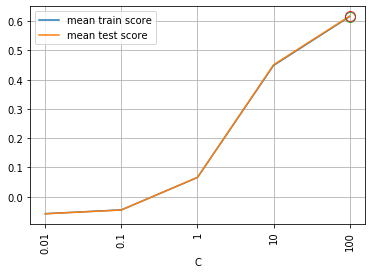

In [73]:
plt.plot(range(result_svr_linear.shape[0]), result_svr_linear['mean_train_score'], label = 'mean train score')
plt.plot(range(result_svr_linear.shape[0]), result_svr_linear['mean_test_score'], label = 'mean test score')
plt.xticks(range(result_svr_linear.shape[0]), result_svr_linear['param_C'], rotation = 90)
plt.plot([grid_svr_linear.best_index_], result_svr_linear['mean_train_score'][grid_svr_linear.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.plot([grid_svr_linear.best_index_], result_svr_linear['mean_test_score'][grid_svr_linear.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.grid()
plt.legend()
plt.xlabel('C')

### SVR with Kernel as 'Linear' Result:

Best parameters: {'C': 100}

Average Cross validation score: 0.6313

Test score: 0.6353

# SVR with kernel 'Poly'

In [74]:
grid_parms_svrp = {'C': [1, 10, 100],'degree':[1,3]}

In [75]:
svr_poly = SVR(kernel='poly')
grid_svr_poly = GridSearchCV(estimator = svr_poly,param_grid = grid_parms_svrp,return_train_score=True,n_jobs= -1,cv=3)

In [76]:
grid_svr_poly.fit(X_train_pca,y_train)

C:\Users\sures\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='poly',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [1, 10, 100], 'degree': [1, 3]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [77]:
print("Best parameters: {}".format(grid_svr_poly.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_svr_poly.best_score_))
pd.DataFrame(grid_svr_poly.cv_results_)

Best parameters: {'C': 100, 'degree': 3}
Best cross-validation score: 0.3299


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,23.254128,0.130570,6.596110,0.170842,1,1,"{'C': 1, 'degree': 1}",-0.054537,-0.049608,-0.057749,-0.053965,0.003348,6,-0.054957,-0.052147,-0.054877,-0.053993,0.001306
1,23.332331,0.081620,6.869311,0.115703,1,3,"{'C': 1, 'degree': 3}",-0.049858,-0.045700,-0.051842,-0.049134,0.002559,5,-0.050355,-0.046481,-0.050056,-0.048964,0.001760
2,23.276346,0.122509,6.476153,0.144612,10,1,"{'C': 10, 'degree': 1}",-0.012475,-0.005292,-0.019735,-0.012501,0.005896,4,-0.013582,-0.010026,-0.014123,-0.012577,0.001817
3,23.554680,0.141295,6.874644,0.150027,10,3,"{'C': 10, 'degree': 3}",0.017563,0.011068,0.020488,0.016373,0.003936,3,0.017736,0.029309,0.012051,0.019699,0.007181
4,14.258874,0.162178,3.183454,0.051462,100,1,"{'C': 100, 'degree': 1}",0.265649,0.277729,0.243082,0.262154,0.014358,2,0.259520,0.260357,0.265892,0.261923,0.002827
5,14.588747,0.018809,3.227981,0.044789,100,3,"{'C': 100, 'degree': 3}",0.343695,0.277114,0.368739,0.329850,0.038665,1,0.358138,0.365400,0.325189,0.349576,0.017497


In [78]:
svr_p = SVR(kernel='poly',C=100,degree = 1)
svr_p.fit(X_train_pca, y_train)
svr_p.score(X_train_pca, y_train)
svrp_test_score = svr_p.score(X_test_pca, y_test)
svrp_test_score

C:\Users\sures\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=100, cache_size=200, coef0=0.0, degree=1, epsilon=0.1,
    gamma='auto_deprecated', kernel='poly', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

0.339842950440979

0.3469074355885491

In [79]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
#scores = cross_val_score(logreg, iris.data, iris.target)
kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(svr_p, X_train_pca, y_train, cv=kfold)))
scores = cross_val_score(svr_p, X_train_pca, y_train, cv=kfold)
print(np.mean(scores))

C:\Users\sures\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\sures\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\sures\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\sures\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

Cross-validation scores:
[0.30922494 0.30948805 0.31625    0.32099569 0.2647425  0.31793301]


C:\Users\sures\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\sures\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\sures\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\sures\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

0.30643903223435004


In [80]:
result_svr_poly= pd.DataFrame(grid_svr_poly.cv_results_)
result_svr_poly

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,23.254128,0.130570,6.596110,0.170842,1,1,"{'C': 1, 'degree': 1}",-0.054537,-0.049608,-0.057749,-0.053965,0.003348,6,-0.054957,-0.052147,-0.054877,-0.053993,0.001306
1,23.332331,0.081620,6.869311,0.115703,1,3,"{'C': 1, 'degree': 3}",-0.049858,-0.045700,-0.051842,-0.049134,0.002559,5,-0.050355,-0.046481,-0.050056,-0.048964,0.001760
2,23.276346,0.122509,6.476153,0.144612,10,1,"{'C': 10, 'degree': 1}",-0.012475,-0.005292,-0.019735,-0.012501,0.005896,4,-0.013582,-0.010026,-0.014123,-0.012577,0.001817
3,23.554680,0.141295,6.874644,0.150027,10,3,"{'C': 10, 'degree': 3}",0.017563,0.011068,0.020488,0.016373,0.003936,3,0.017736,0.029309,0.012051,0.019699,0.007181
4,14.258874,0.162178,3.183454,0.051462,100,1,"{'C': 100, 'degree': 1}",0.265649,0.277729,0.243082,0.262154,0.014358,2,0.259520,0.260357,0.265892,0.261923,0.002827
5,14.588747,0.018809,3.227981,0.044789,100,3,"{'C': 100, 'degree': 3}",0.343695,0.277114,0.368739,0.329850,0.038665,1,0.358138,0.365400,0.325189,0.349576,0.017497


([<matplotlib.axis.XTick at 0x1da5f3e3860>,
 <a list of 6 Text xticklabel objects>)

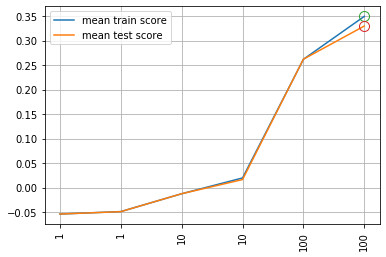

In [81]:
plt.plot(range(result_svr_poly.shape[0]), result_svr_poly['mean_train_score'], label = 'mean train score')
plt.plot(range(result_svr_poly.shape[0]), result_svr_poly['mean_test_score'], label = 'mean test score')
plt.xticks(range(result_svr_poly.shape[0]), result_svr_poly['param_C'], rotation = 90)
plt.plot([grid_svr_poly.best_index_], result_svr_poly['mean_train_score'][grid_svr_poly.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.plot([grid_svr_poly.best_index_], result_svr_poly['mean_test_score'][grid_svr_poly.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.grid()
plt.legend()

### SVR with Kernel as 'Poly' Result:

Best parameters: {'C': 100, 'degree': 1}

Average Cross validation score: 0.2491

Test score: 0.2900

# SVR with kernel 'rbf'

In [82]:
grid_parms_rbf = {'C': [0.1, 1, 10, 100],'gamma':[0.1, 1, 10, 100]}

In [83]:
svr_rbf = SVR(kernel='rbf')
grid_svr_rbf = GridSearchCV(estimator = svr_rbf,param_grid = grid_parms_rbf,return_train_score=True,n_jobs= -1,cv=3)

In [84]:
grid_svr_rbf.fit(X_train_pca,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [85]:
print("Best parameters: {}".format(grid_svr_rbf.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_svr_rbf.best_score_))

Best parameters: {'C': 100, 'gamma': 0.1}
Best cross-validation score: -0.0381


In [86]:
svr_rbf = SVR(kernel='rbf',C=100,gamma=0.1)
svr_rbf.fit(X_train_pca, y_train)
svr_rbf.score(X_train_pca, y_train)
svr_rbf_test_score = svr_rbf.score(X_test_pca, y_test)
svr_rbf_test_score

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

-0.028330906484922425

-0.030019383866990438

In [87]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(svr_rbf, X_train_pca, y_train, cv=kfold)))
scores = cross_val_score(svr_rbf, X_train_pca, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[-0.02990816 -0.03797255 -0.02783412 -0.02870204 -0.03577715 -0.04021029]
-0.03340071855324526


In [88]:
result_rbf = pd.DataFrame(grid_svr_rbf.cv_results_)
result_rbf

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,27.532895,0.048610,8.707783,0.024768,0.1,0.1,"{'C': 0.1, 'gamma': 0.1}",-0.059576,-0.054359,-0.061540,-0.058492,0.003030,7,-0.059917,-0.056651,-0.058973,-0.058514,0.001372
1,29.641592,0.239774,8.694346,0.104938,0.1,1,"{'C': 0.1, 'gamma': 1}",-0.059597,-0.054388,-0.061547,-0.058511,0.003022,10,-0.059939,-0.056677,-0.058981,-0.058532,0.001369
2,31.569440,0.091203,11.278477,0.279468,0.1,10,"{'C': 0.1, 'gamma': 10}",-0.059598,-0.054389,-0.061547,-0.058511,0.003022,12,-0.059940,-0.056678,-0.058981,-0.058533,0.001369
3,45.740969,0.166831,17.850164,0.185287,0.1,100,"{'C': 0.1, 'gamma': 100}",-0.059598,-0.054389,-0.061547,-0.058511,0.003022,13,-0.059940,-0.056678,-0.058981,-0.058533,0.001369
4,26.852856,0.019146,9.383688,0.057302,1,0.1,"{'C': 1, 'gamma': 0.1}",-0.059377,-0.054094,-0.061448,-0.058306,0.003096,4,-0.059709,-0.056407,-0.058865,-0.058327,0.001401
5,29.330293,0.030375,8.989663,0.091378,1,1,"{'C': 1, 'gamma': 1}",-0.059586,-0.054377,-0.061546,-0.058503,0.003025,8,-0.059925,-0.056665,-0.058976,-0.058522,0.001369
6,31.432979,0.100050,11.560498,0.509793,1,10,"{'C': 1, 'gamma': 10}",-0.059597,-0.054388,-0.061548,-0.058511,0.003022,11,-0.059936,-0.056674,-0.058978,-0.058529,0.001369
7,46.401722,0.375354,18.812357,0.155020,1,100,"{'C': 1, 'gamma': 100}",-0.059598,-0.054389,-0.061548,-0.058512,0.003022,14,-0.059936,-0.056675,-0.058979,-0.058530,0.001369
8,27.166951,0.164645,8.937667,0.012979,10,0.1,"{'C': 10, 'gamma': 0.1}",-0.057380,-0.051998,-0.060236,-0.056538,0.003415,2,-0.057616,-0.054508,-0.057497,-0.056540,0.001438
9,29.416941,0.096765,8.971848,0.070980,10,1,"{'C': 10, 'gamma': 1}",-0.059474,-0.054273,-0.061496,-0.058415,0.003042,5,-0.059779,-0.056547,-0.058888,-0.058405,0.001363


([<matplotlib.axis.XTick at 0x1da5a04dba8>,
 <a list of 6 Text xticklabel objects>)

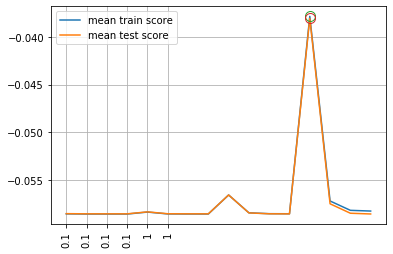

In [89]:
plt.plot(range(result_rbf.shape[0]), result_rbf['mean_train_score'], label = 'mean train score')
plt.plot(range(result_rbf.shape[0]), result_rbf['mean_test_score'], label = 'mean test score')
plt.xticks(range(result_svr_poly.shape[0]), result_rbf['param_C'], rotation = 90)
plt.plot([grid_svr_rbf.best_index_], result_rbf['mean_train_score'][grid_svr_rbf.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.plot([grid_svr_rbf.best_index_], result_rbf['mean_test_score'][grid_svr_rbf.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.grid()
plt.legend()

### SVR with Kernel as 'rbf' Result:

Best parameters: {'C': 100, 'gamma': 0.1}

Average Cross validation score: -0.0372

Test score: -0.0345

### Without PCA

In [56]:
result = pd.DataFrame(data=d)
result

,Model,Test Score
0,Linear Regression,0.705692
1,KNN Regression,0.701962
2,Ridge Regression,0.705851
3,Lasso Regression,0.705733
4,Polynominal Regression,0.792932
5,Simple SVR,0.570570
6,SVR with Linear kernel,0.635989
7,SVR with Poly kernel,0.283364
8,SVR with rbf kernel,-0.038501


### With PCA

In [96]:
result = {'Model': ['Linear Regression', 'KNN Regression','Ridge Regression','Lasso Regression','Polynominal Regression','Simple SVR','SVR with Linear kernel','SVR with Poly kernel','SVR with rbf kernel'],
          'Test Score': [lr_test_score, knn_test_score_, ridge_test_score_,lass_test_score_,pol_reg_test_score,lsvr_test_score,svr_test_score,svrp_test_score,svr_rbf_test_score]}

In [98]:
result = pd.DataFrame(data=result)
result

,Model,Test Score
0,Linear Regression,0.677341
1,KNN Regression,0.707220
2,Ridge Regression,0.677342
3,Lasso Regression,0.677345
4,Polynominal Regression,0.794549
5,Simple SVR,0.551672
6,SVR with Linear kernel,0.619345
7,SVR with Poly kernel,0.346907
8,SVR with rbf kernel,-0.030019


After applying PCA, it helped the model to run quicker and obtain the result. When comparing the result, it turns out to be almost the same for the models when ran without applying PCA.

### Deep Learning Model

In [9]:
# %matplotlib inline
import numpy as np
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.utils import np_utils

Using TensorFlow backend.


In [10]:
X_train_nn = np.asarray(X_train_scale)
X_test_nn = np.asarray(X_test_scale)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

In [23]:
X_train_nn.shape

(14557, 31)

In [12]:
# step 1: build the model
model1 = Sequential()
#input layer
model1.add(Dense(10, input_dim = 31, activation = 'relu'))
#hidden layer
model1.add(Dense(5, activation = 'relu'))
#output layer
model1.add(Dense(1, activation = 'sigmoid'))


# step 2: build the computational graph - compile
model1.compile(loss = 'mean_squared_error', optimizer = 'adam')

# step 3: train the model
model1.fit(X_train_nn, y_train, epochs = 1000, batch_size = 100)

# step 4: model evaluation

Train on 14557 samples
Epoch 1/1000
14557/14557 [==============================] - 2s 149us/sample - loss: 427122713812.3690
Epoch 2/1000
14557/14557 [==============================] - 0s 22us/sample - loss: 427122500679.6807
Epoch 3/1000
14557/14557 [==============================] - 0s 22us/sample - loss: 427122456602.5901
Epoch 4/1000
14557/14557 [==============================] - 0s 22us/sample - loss: 427122447870.9097
Epoch 5/1000
14557/14557 [==============================] - 0s 22us/sample - loss: 427122446074.6011
Epoch 6/1000
14557/14557 [==============================] - 0s 22us/sample - loss: 427122441786.4208
Epoch 7/1000
14557/14557 [==============================] - 0s 22us/sample - loss: 427122442490.9880
Epoch 8/1000
14557/14557 [==============================] - 0s 22us/sample - loss: 427122443927.1345
Epoch 9/1000
14557/14557 [==============================] - 0s 23us/sample - loss: 427122444129.7256
Epoch 10/1000
14557/14557 [==============================] - 0s 20u

14557/14557 [==============================] - 0s 21us/sample - loss: 427122444967.1026
Epoch 161/1000
14557/14557 [==============================] - 0s 21us/sample - loss: 427122441433.0118
Epoch 162/1000
14557/14557 [==============================] - 0s 21us/sample - loss: 427122444681.2239
Epoch 163/1000
14557/14557 [==============================] - 0s 22us/sample - loss: 427122438589.9820
Epoch 164/1000
14557/14557 [==============================] - 0s 22us/sample - loss: 427122440586.6307
Epoch 165/1000
14557/14557 [==============================] - 0s 22us/sample - loss: 427122443519.7010
Epoch 166/1000
14557/14557 [==============================] - 0s 22us/sample - loss: 427122442662.0650
Epoch 167/1000
14557/14557 [==============================] - 0s 22us/sample - loss: 427122441685.1252
Epoch 168/1000
14557/14557 [==============================] - 0s 22us/sample - loss: 427122440438.0639
Epoch 169/1000
14557/14557 [==============================] - 0s 21us/sample - loss: 427

14557/14557 [==============================] - 0s 25us/sample - loss: 427122440140.9301
Epoch 319/1000
14557/14557 [==============================] - 0s 27us/sample - loss: 427122441811.1819
Epoch 320/1000
14557/14557 [==============================] - 0s 26us/sample - loss: 427122439130.2252
Epoch 321/1000
14557/14557 [==============================] - 0s 27us/sample - loss: 427122445203.4589
Epoch 322/1000
14557/14557 [==============================] - 0s 26us/sample - loss: 427122444537.1590
Epoch 323/1000
14557/14557 [==============================] - 0s 30us/sample - loss: 427122443996.9158
Epoch 324/1000
14557/14557 [==============================] - 0s 33us/sample - loss: 427122447344.1725
Epoch 325/1000
14557/14557 [==============================] - 0s 32us/sample - loss: 427122440363.7804
Epoch 326/1000
14557/14557 [==============================] - 0s 30us/sample - loss: 427122442110.5667
Epoch 327/1000
14557/14557 [==============================] - 0s 28us/sample - loss: 427

14557/14557 [==============================] - 0s 23us/sample - loss: 427122442578.7775
Epoch 477/1000
14557/14557 [==============================] - 0s 23us/sample - loss: 427122444843.2968
Epoch 478/1000
14557/14557 [==============================] - 0s 23us/sample - loss: 427122444872.5600
Epoch 479/1000
14557/14557 [==============================] - 0s 22us/sample - loss: 427122444021.6770
Epoch 480/1000
14557/14557 [==============================] - 0s 23us/sample - loss: 427122441662.6151
Epoch 481/1000
14557/14557 [==============================] - 0s 23us/sample - loss: 427122444962.6005
Epoch 482/1000
14557/14557 [==============================] - 0s 23us/sample - loss: 427122442731.8464
Epoch 483/1000
14557/14557 [==============================] - 0s 22us/sample - loss: 427122441894.4695
Epoch 484/1000
14557/14557 [==============================] - 0s 22us/sample - loss: 427122438583.2289
Epoch 485/1000
14557/14557 [==============================] - 0s 23us/sample - loss: 427

14557/14557 [==============================] - 0s 12us/sample - loss: 427122441989.0120
Epoch 635/1000
14557/14557 [==============================] - 0s 12us/sample - loss: 427122443663.7659
Epoch 636/1000
14557/14557 [==============================] - 0s 10us/sample - loss: 427122442891.6683
Epoch 637/1000
14557/14557 [==============================] - 0s 10us/sample - loss: 427122443292.3487
Epoch 638/1000
14557/14557 [==============================] - 0s 10us/sample - loss: 427122446916.4800
Epoch 639/1000
14557/14557 [==============================] - 0s 10us/sample - loss: 427122441093.1087
Epoch 640/1000
14557/14557 [==============================] - 0s 11us/sample - loss: 427122441671.6191
Epoch 641/1000
14557/14557 [==============================] - 0s 11us/sample - loss: 427122443159.5389
Epoch 642/1000
14557/14557 [==============================] - 0s 11us/sample - loss: 427122442689.0771
Epoch 643/1000
14557/14557 [==============================] - 0s 11us/sample - loss: 427

14557/14557 [==============================] - 0s 11us/sample - loss: 427122444062.1953
Epoch 793/1000
14557/14557 [==============================] - 0s 11us/sample - loss: 427122446355.9778
Epoch 794/1000
14557/14557 [==============================] - 0s 11us/sample - loss: 427122447938.4401
Epoch 795/1000
14557/14557 [==============================] - 0s 11us/sample - loss: 427122443886.6162
Epoch 796/1000
14557/14557 [==============================] - 0s 11us/sample - loss: 427122444597.9363
Epoch 797/1000
14557/14557 [==============================] - 0s 11us/sample - loss: 427122442817.3849
Epoch 798/1000
14557/14557 [==============================] - 0s 11us/sample - loss: 427122442499.9921
Epoch 799/1000
14557/14557 [==============================] - 0s 11us/sample - loss: 427122446117.3703
Epoch 800/1000
14557/14557 [==============================] - 0s 11us/sample - loss: 427122439839.2944
Epoch 801/1000
14557/14557 [==============================] - 0s 11us/sample - loss: 427

14557/14557 [==============================] - 0s 13us/sample - loss: 427122440816.2341
Epoch 950/1000
14557/14557 [==============================] - 0s 12us/sample - loss: 427122442362.6802
Epoch 951/1000
14557/14557 [==============================] - 0s 17us/sample - loss: 427122441885.4655
Epoch 952/1000
14557/14557 [==============================] - 0s 17us/sample - loss: 427122443924.8834
Epoch 953/1000
14557/14557 [==============================] - 0s 12us/sample - loss: 427122442538.2593
Epoch 954/1000
14557/14557 [==============================] - 0s 12us/sample - loss: 427122442666.5670
Epoch 955/1000
14557/14557 [==============================] - 0s 15us/sample - loss: 427122443222.5673
Epoch 956/1000
14557/14557 [==============================] - 0s 12us/sample - loss: 427122442929.9355
Epoch 957/1000
14557/14557 [==============================] - 0s 12us/sample - loss: 427122442587.7816
Epoch 958/1000
14557/14557 [==============================] - 0s 13us/sample - loss: 427

In [14]:
model1.evaluate(X_train_nn, y_train)

14557/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

427122442689.07715

In [16]:
model1.evaluate(X_test_nn, y_test)

4853/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

427457056108.8251